## Thu thập dữ liệu

`MASHVISOR` cung cấp các API trả về các thông tin liên quan đến bất động sản. [Link API document](https://www.mashvisor.com/api-doc/#the-property-object) \
Nhóm tập trung lấy thông tin các căn nhà hiện đang được bán ở thành phố Chicago bang IL, nước Mỹ.

### Import

In [3]:
import requests
import pandas as pd
import csv
import time
import seaborn as sns 

### Gọi API

API được dùng: `https://api.mashvisor.com/v1.1/client/property?id=2214791&state=IL` \
Gồm 2 tham số bắt buộc: 
- id: mã số của ngôi nhà
- state: tên bang 

In [2]:
# Đọc mã id đã lấy được
f = open("id.txt", "r")
crawlID = f.read().split("\n")
f.close()

In [56]:
# Lấy 100 id để gọi api ==> Do mỗi email chỉ cho lấy đc 100 dòng dữ liệu 
# dòng dưới đây là dòng lấy dữ liệu của email cuối cùng
id_s = crawlID[2600:2616]

In [4]:
# Bỏ các cột không phù hợp với bài toán hồi quy và giữ lại các cột có khả năng đóng góp cho mô hình
def delKeys(res):
    keys_to_remove = ["image",'extra_images','agents','stateInterest','neighborhood','description','created_at','updated_ar',
            'updated_at','description','ROI','meta','disclaimer','modification_timestamp',
            'videos','virtual_tours','owner_first_name','owner_last_name']
    for key in keys_to_remove:
        res.pop(key, None)    
    return res

In [57]:
method = "get"
headers = {
    'x-api-key': "3204a295-8a89-4545-96de-4499e3acc430" # Người dùng cung cấp
    }
jsonResult= []

for id_ in id_s:
    url = f'https://api.mashvisor.com/v1.1/client/property?id={int(id_)}&state=IL'
    rsp = requests.request(method, url, headers=headers)
    response = rsp.json()
    if response['status'] == 'success':
        jsonResult.append(delKeys(response["content"]))
    time.sleep(2)

In [58]:
# # Ghi dữ liệu
f=open('data_raw_expand.csv', 'a')
f.write(pd.DataFrame.from_dict(jsonResult).to_csv(index=False, header=None))
f.close()

## Khám phá dữ liệu (lựa chọn cột có thể sử dụng cho bài toán)

#### Đọc dữ liệu từ file vào DataFrame

In [4]:
df = pd.read_csv('data_raw_expand.csv')
df.head(1)

,isShortSale,source,yearBuilt,nextOpenHouseEndTime,sqft,lastSaleDate,id,state,county,longitude,...,hoa_dues,view_type,parcel_number,architecture_style,has_pool,is_water_front,needs_repair,tenant_occupied,is_market_place,schools
0,NaN,Chicagoland Brokers Inc.,1955.0,NaN,1100.0,NaN,2521392,IL,Cook County,-87.720482,...,NaN,NaN,1.935310e+13,Other,NaN,NaN,0,0,0,"[{'category': 'Elementary', 'name': None, 'dis..."


#### Số dòng, cột

In [5]:
df.shape

(2616, 61)

#### Các cột của dữ liệu

In [6]:
df.columns

Index(['isShortSale', 'source', 'yearBuilt', 'nextOpenHouseEndTime', 'sqft',
       'lastSaleDate', 'id', 'state', 'county', 'longitude', 'zip', 'tax',
       'mls_id', 'daysOnMarket', 'homeType', 'property_type',
       'property_sub_type', 'beds', 'num_of_units', 'favorite', 'city',
       'saleType', 'latitude', 'nextOpenHouseDate', 'recentReductionDate',
       'title', 'rent_appreciation_rate', 'originalListPrice', 'parkingSpots',
       'parkingType', 'address', 'nextOpenHouseStartTime', 'lotSize', 'url',
       'baths', 'address_revealing', 'location', 'interested', 'listPrice',
       'price_per_sqft', 'lastSalePrice', 'is_foreclosure',
       'foreclosure_status', 'occupancy_status', 'owner_occupied',
       'heating_system', 'cooling_system', 'walkscore',
       'investment_likelihood_label', 'investment_likelihood_score',
       'investment_likelihood_stars', 'hoa_dues', 'view_type', 'parcel_number',
       'architecture_style', 'has_pool', 'is_water_front', 'needs_repair',


#### Ý nghĩa của các cột:
- `isShortSale`: nhà đó có phải dạng cho thuê ngắn hạn hay không
- `source`:  tên tổ chức cho phép này được mua bán
- `yearBuilt`: năm xây dựng căn nhà
- `nextOpenHouseEndTime`: thời gian mở bán kết thúc
- `sqft`: diện tích 
- `lastSaleDate`: ngày bán cuối cùng
- `id`: mã nhà
- `state`: tiểu bang
- `county`: quận
- `longitude`: kinh độ
- `zip`: mã bưu điện 
- `tax`: tiền thuế
- `mls_id` : mã MLS
- `daysOnMarket`: số ngày kể từ khi được đăng bán
- `homeType`: thuộc tính phụ do nhà cung cấp MLS cung cấp
- `property_type`: thuộc tính chính do nhà cung cấp MLS cung cấp
- `property_sub_type`: danh mục tài sản bất đông sản
- `beds`: số phòng ngủ 
- `num_of_units`: số lượng nhà trong trường hợp bất động sản đa hệ gia đình (multifamily properties)
- `favorite` : được yêu thích hay không
- `city`: thành phố
- `saleType`: nhà cung cấp
- `latitude`: vĩ độ
- `nextOpenHouseDate`: thời gian khai trương mở bán
- `recentReductionDate`: ngày giảm giá gần đây
- `title`:  tiêu đề
- `rent_appreciation_rate`:  tỉ lệ thuê/mua
- `originalListPrice`:  số tiền mở bán lúc mới bắt đầu
- `parkingSpots`: số lượng bãi giữ xe
- `parkingType`: loại bãi giữ xe
- `address`: địa chỉ 
- `nextOpenHouseStartTime`: thời gian mở bán
- `lotSize`: diện tích sử dụng 
- `url`: URL
- `baths`: số lượng phòng tắm 
- `address_revealing`: cho phép lộ địa chỉ
- `location`: khu vực lân cận 
- `interested`: hứng thú
- `listPrice`: giá căn nhà
- `price_per_sqft`: giá trên 1 đơn vị diện tích 
- `lastSalePrice`: giá bán cuối cùng 
- `is_foreclosure`: tịch thu hay không
- `foreclosure_status`:  tình trạng tịch thu nhà
- `occupancy_status`: tình trạng tài sản được sử dụng
- `owner_occupied`: sở hữu bởi chủ nhà
- `heating_system`: hệ thống sưởi
- `cooling_system`: hệ thống làm lạnh 
- `walkscore`: giá trị điểm số
- `investment_likelihood_label`: nhãn thể hiện khả năng đầu tư
- `investment_likelihood_score`: số điểm thể hiện khả năng đầu tư
- `investment_likelihood_stars`: số sao thể hiện khả năng đầu tư
- `view_type`: view căn nhà 
- `parcel_number`: APN tài sản được chỉ định bởi người định thuế
- `architecture_style`: loại kiến trúc  
- `has_pool`: có hồ bơi
- `is_water_front`: nhà hướng sông
- `needs_repair`: có cần chuẩn bị gì không
- `tenant_occupied`: sở hữu bởi người thuê nhà 
- `is_market_place`: gần chợ hay không
- `schools`: trường học

### Tiền xử lý

Có thể thấy là có quá nhiều cột trong dữ liệu. Để có thể làm bài toán của nhóm. Tụi em quyết định chỉ chọn ra các cột thật sự cần thiết trong việc dự đoán giá nhà ở như `beds`, `baths`, `sqft`, `homeType`, `parkingSpots`,`lotSize`, `listPrice`, `heating_system`, `cooling_system`, `view_type`, `architecture_style`, `has_pool`, `yearBuilt`, `tax`, `city`, `address`.

In [7]:
new_df = df[['sqft', 'homeType', 'beds', 'parkingSpots','lotSize', 'baths','listPrice', 'heating_system', 'cooling_system', 
             'view_type', 'architecture_style', 'yearBuilt', 'has_pool', 'city', 'address', 'tax']]
new_df.to_csv('data_expand.csv', index = False)

## Khám phá dữ liệu (cải thiện mô hình)

Sau khi huấn luyện mô hình với bộ dữ liệu đầu tiên có kích thước `1165 mẫu`, nhóm nhận ra `80%` dữ liệu tập trung vào các ngôi nhà có `Sale Price` < 400000$\$$. Với mô hình Linear Regression thì phân phối cột output như vậy sẽ khiến mô hình dễ bị ảnh hưởng bởi nhiễu. \
$\to$ Cải thiện mô hình bằng cách thêm dữ liệu cho các ngôi nhà có giá tiền cao 

In [11]:
(df.iloc[:1165]['listPrice'] < 400000).mean()

0.7716738197424893

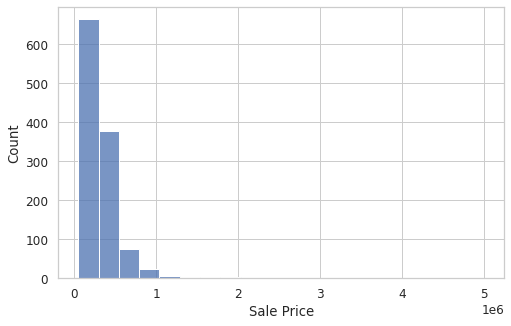

In [9]:
data_1 = df.iloc[:1165]

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(data =  data_1['listPrice'], bins=20).set(xlabel='Sale Price', ylabel='Count');

### Tiền xử lý

In [12]:
data_2 = df.iloc[1165:]

In [13]:
data_2=data_2[data_2['listPrice'] > 400000]

In [14]:
data=pd.concat([data_1, data_2], ignore_index = True, axis = 0)

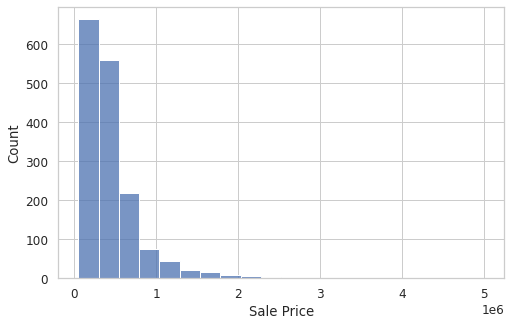

In [15]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(data =  data['listPrice'], bins=20).set(xlabel='Sale Price', ylabel='Count');

In [80]:
data = data[['sqft', 'homeType', 'beds', 'parkingSpots','lotSize', 'baths','listPrice', 'heating_system', 'cooling_system', 
             'view_type', 'architecture_style', 'yearBuilt', 'has_pool', 'city', 'address', 'tax']]
data.to_csv('data_better_distribution.csv', index = False)